## Урок 1. Введение в PyTorch

Домашнее задание: 
* Добиться вразумительного результата от модели, собранной на занятии (7 угаданныx картинок из 10 предложенных на семинаре). Варианты изменений:
        * изменение слоёв и их количества;
        * изменение метода оптимизации; 
        * изменение процесса обучения; 
        * для продвинутых: преобразование данных transform
* Переписать данный туториал на pytorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru


Задание 1

In [1]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения
from torch import nn 
from torch import optim
import torch.nn.functional as F

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ../../data/cifar-10-python.tar.gz


Extracting ../../data/cifar-10-python.tar.gz to ../../data/


torch.Size([3, 32, 32])
bird


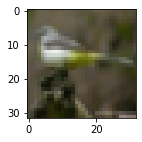

In [6]:
image, label = train_dataset[57]
print (image.size())
print (classes[label])
fig = plt.figure(figsize=(2, 2))
plt.imshow(image.permute(1, 2, 0).numpy())

In [7]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


Extracting ./data/cifar-10-python.tar.gz to ./data


#### Определим следующую модель:

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 32, 3)
        self.conv4 = nn.Conv2d(32, 64, 3)
        self.conv5 = nn.Conv2d(64, 64, 3)
        self.conv6 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 90)
        self.fc3 = nn.Linear(90, 60)
        self.fc4 = nn.Linear(60, 10)
        self.pad = (1, 1, 1, 1)  

    def forward(self, x):
        x = F.relu(F.pad(self.conv1(x), self.pad))
        x = self.pool(F.relu(F.pad(self.conv2(x), self.pad)))
        x = F.relu(F.pad(self.conv3(x), self.pad))
        x = self.pool(F.relu(F.pad(self.conv4(x), self.pad)))
        x = F.relu(F.pad(self.conv5(x), self.pad))
        x = self.pool(F.relu(F.pad(self.conv6(x), self.pad)))
        
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net().to(device)

In [9]:
net

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=10, bias=True)
)

In [10]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters())

In [11]:
for epoch in range(20):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # inputs, labels = data[0], data[1]
        inputs, labels = data[0].to(device), data[1].to(device)
        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.306
[1,   601] loss: 0.255
[2,     1] loss: 0.001
[2,   301] loss: 0.218
[2,   601] loss: 0.202
[3,     1] loss: 0.001
[3,   301] loss: 0.181
[3,   601] loss: 0.172
[4,     1] loss: 0.001
[4,   301] loss: 0.158
[4,   601] loss: 0.151
[5,     1] loss: 0.001
[5,   301] loss: 0.139
[5,   601] loss: 0.137
[6,     1] loss: 0.001
[6,   301] loss: 0.126
[6,   601] loss: 0.125
[7,     1] loss: 0.000
[7,   301] loss: 0.115
[7,   601] loss: 0.114
[8,     1] loss: 0.000
[8,   301] loss: 0.104
[8,   601] loss: 0.104
[9,     1] loss: 0.000
[9,   301] loss: 0.094
[9,   601] loss: 0.097
[10,     1] loss: 0.000
[10,   301] loss: 0.086
[10,   601] loss: 0.089
[11,     1] loss: 0.000
[11,   301] loss: 0.080
[11,   601] loss: 0.083
[12,     1] loss: 0.000
[12,   301] loss: 0.074
[12,   601] loss: 0.077
[13,     1] loss: 0.000
[13,   301] loss: 0.067
[13,   601] loss: 0.071
[14,     1] loss: 0.000
[14,   301] loss: 0.062
[14,   601] loss: 0.067
[15,     1] loss: 0

#### Сохранение модели

In [12]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [13]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([16, 3, 3, 3])
conv1.bias  \  torch.Size([16])
conv2.weight  \  torch.Size([32, 16, 3, 3])
conv2.bias  \  torch.Size([32])
conv3.weight  \  torch.Size([32, 32, 3, 3])
conv3.bias  \  torch.Size([32])
conv4.weight  \  torch.Size([64, 32, 3, 3])
conv4.bias  \  torch.Size([64])
conv5.weight  \  torch.Size([64, 64, 3, 3])
conv5.bias  \  torch.Size([64])
conv6.weight  \  torch.Size([128, 64, 3, 3])
conv6.bias  \  torch.Size([128])
fc1.weight  \  torch.Size([120, 2048])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([90, 120])
fc2.bias  \  torch.Size([90])
fc3.weight  \  torch.Size([60, 90])
fc3.bias  \  torch.Size([60])
fc4.weight  \  torch.Size([10, 60])
fc4.bias  \  torch.Size([10])


#### Загрузка и использование модели 

In [14]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


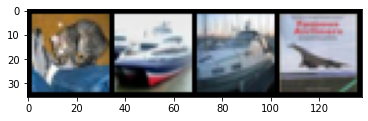

In [16]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
print(outputs)

tensor([[ -6.4576,  -3.6038,  -2.0954,   4.9035,  -3.2913,   2.6160,   1.2452,
          -2.9720,  -3.9139,  -4.8011],
        [  3.3333,   9.1154, -10.7427,  -9.5116, -17.1023, -16.6750, -13.1682,
         -15.7761,  16.0037,   6.9687],
        [ -0.7806,  -0.6343,  -2.6260,  -2.0972,  -6.2467,  -5.8877,  -1.7725,
          -6.1736,   8.3234,  -2.8312],
        [  4.1358,   0.4699,  -0.1497,  -0.1995,  -4.7820,  -2.6064,  -4.3275,
          -5.0113,   0.9101,  -1.5094]], grad_fn=<AddmmBackward>)


In [18]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


Задание 2

In [19]:
# transform=transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize((0.1307,), (0.3081,))
#         ])

In [20]:
train_dataset_mnist = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist, batch_size=64,
                                          shuffle=True, num_workers=12)

In [21]:
test_dataset_mnist = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader_mnist = torch.utils.data.DataLoader(test_dataset_mnist, batch_size=4,
                                         shuffle=False, num_workers=12)

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten(1, -1)
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(self.flatten(x)))
        x = F.softmax(self.fc2(F.dropout(x, 0.2)))
        return x

net_for_mnist = Net().to(device)

In [23]:
criterion_mnist = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(net_for_mnist.parameters())

In [24]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader_mnist, 0):
        inputs_mnist, labels_mnist = data[0].to(device), data[1].to(device)


        # zero the parameter gradients
        optimizer_mnist.zero_grad()

        # forward + backward + optimize
        outputs_mnist = net_for_mnist(inputs_mnist)
        loss = criterion_mnist(outputs_mnist, labels_mnist)
        loss.backward()
        optimizer_mnist.step()

        # print statistics
        running_loss += loss.item()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 499))
            running_loss = 0.0
print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


[1,     1] loss: 0.005
[1,   301] loss: 1.029
[1,   601] loss: 0.947
[1,   901] loss: 0.937
[2,     1] loss: 0.003
[2,   301] loss: 0.929
[2,   601] loss: 0.923
[2,   901] loss: 0.922
[3,     1] loss: 0.003
[3,   301] loss: 0.916
[3,   601] loss: 0.913
[3,   901] loss: 0.913
[4,     1] loss: 0.003
[4,   301] loss: 0.910
[4,   601] loss: 0.908
[4,   901] loss: 0.909
[5,     1] loss: 0.003
[5,   301] loss: 0.905
[5,   601] loss: 0.905
[5,   901] loss: 0.905
Finished Training
